<a href="https://colab.research.google.com/github/BrunoRSalles/Incendios-Florestais/blob/main/Inc%C3%AAndios_Florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **incêndios florestais no Brasil** <p>
Os incêndios florestais são um grave problema para a preservação das Florestas Tropicais. Compreender a frequência de incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los.
O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.

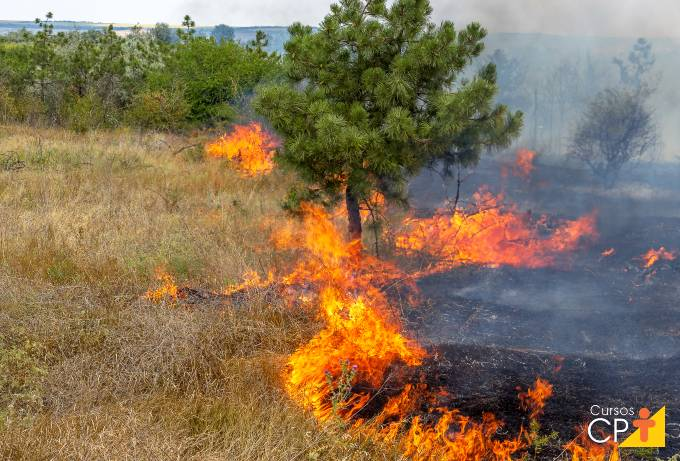

# **Base de Dados**
[Link do Download](https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing)

In [ ]:
# Bibliotecas 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings

dados = pd.read_csv( 'Dados_Indendio.csv', encoding = 'latin-1' )
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Verificando os Dados

In [ ]:
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
dados.shape

(6454, 5)

# Números de Incêndios por ano

In [ ]:
# Verificando números de Incêndios por ano
analise = dados.groupby( by=['year'] ).sum().reset_index()
analise.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


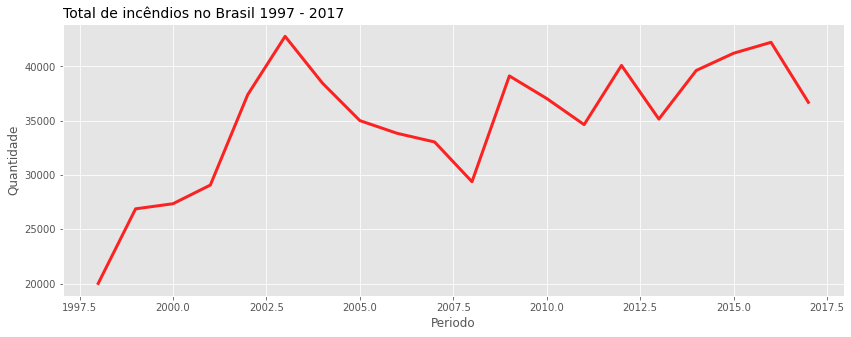

In [ ]:
# Desenvolvendo o grafico

#Tamanho
plt.figure( figsize=( 14, 5 ) )

# Estilo
plt.style.use('ggplot')

# Titulo
plt.title( 'Total de incêndios no Brasil 1997 - 2017', loc = 'left', fontsize = 14 )

# Grafico
sns.lineplot( data= analise, x='year', y='number', estimator = 'sum', lw= 3, color = 'red', alpha =0.85 )

# Labels
plt.xlabel('Periodo')
plt.ylabel('Quantidade');

**Aqui podemos observar o Total de incêndios que tivemos no Brasil como um todo ao longo dos anos**

# Número de Incêndios por Mês 

In [ ]:
analise02 = dados.groupby( by = ['year', 'month'] ).sum().reset_index()
analise02

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000
...,...,...,...
234,2017,Maio,2506.000
235,2017,Março,2017.000
236,2017,Novembro,6217.379
237,2017,Outubro,3600.159


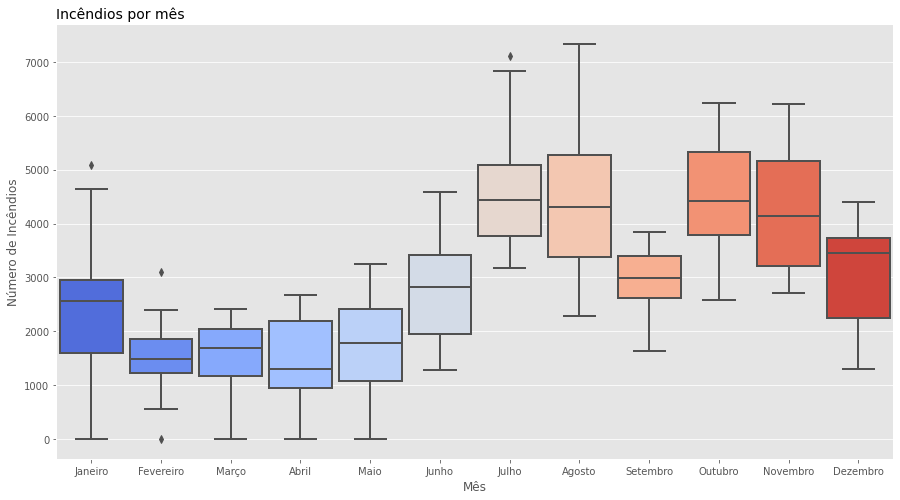

In [ ]:
# Montando o grafivo

# Tamanho
plt.figure( figsize = ( 15,8 ) )

# Titulo
plt.title( 'Incêndios por mês', loc = 'left', fontsize = 14 )

# Grafico 
sns.boxplot( data=analise02, x='month', y='number',
            # Colocando uma paleta de cores
            palette = 'coolwarm',saturation = 1, width = 0.9, linewidth= 2 ,
            # O grafico veio com os meses embaralhados, por isso esse parametro para ordena los
            order=[ 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro' ]
            ) 

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios');

**Durante os anos que se passaram podemos observar que temos a maior concentração de incêndios após o meio do ano, com destaques para Agosto e Outubro**

# Número de Incêndios por Estado

In [ ]:
analise03= dados.groupby( by = ['state'] ).sum().reset_index()[['state','number']].sort_values('number', ascending = False)
analise03

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


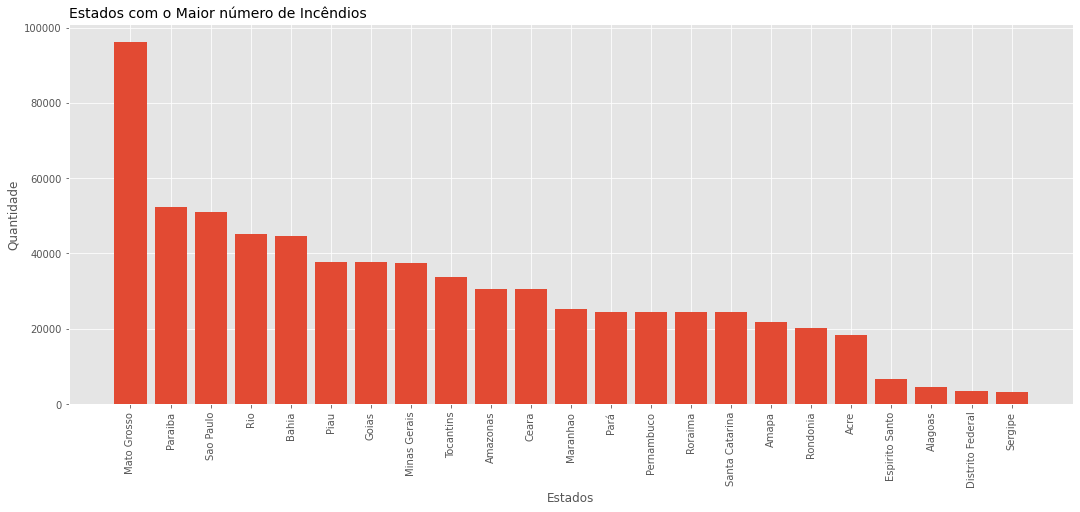

In [ ]:
# Tamanho
plt.figure( figsize = ( 18, 7 ) ) 

# Titulo
plt.title( 'Estados com o Maior número de Incêndios', loc = 'left', fontsize = 14,  )

# Grafico
plt.bar( analise03['state'], analise03['number'] )

# Labels
plt.xlabel( 'Estados' )
plt.xticks ( rotation = 90 ) # Esse parametro faz a rotação dos indices no eixo x, para que eles não fiquem sobrepostos 
plt.ylabel( 'Quantidade' );

Podemos observar que o TOP 3 Estados que mais sofrem com os Incêndios ao longo dos anos são, Mato Grosso, disparado com o mair indice de incêndios do que demais estados, Paraíba e São Paulo ocupam a segunda e terceira posição

Também podemos analizar que por maior que seja, o Estado do Amazonas ocupa o 10º lugar nesse ranking. Porem sua floresta tem extenssões que chegam no estado do Acre por exemplo e também nos estados de Rondonia e Roraima. Se estivessemos analizando apenas pela floresta com certeza seus dados aumentariam e muito também

# Análise do TOP10

In [ ]:
top10 = analise03['state'][0:10].values
top10

array(['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia', 'Piau',
       'Goias', 'Minas Gerais', 'Tocantins', 'Amazonas'], dtype=object)

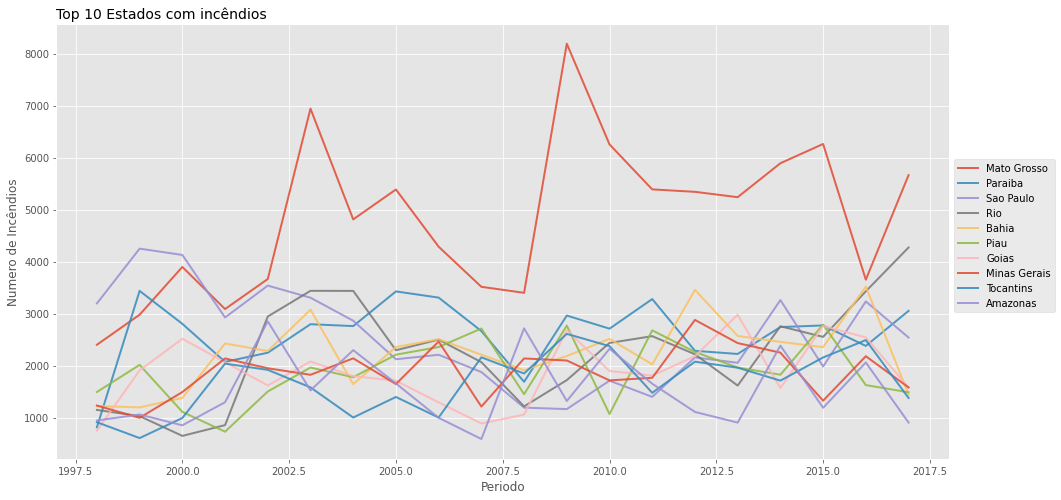

In [ ]:
# Tamanho
plt.figure( figsize = (16, 8) )

# Grafico
plt.title( 'Top 10 Estados com incêndios', loc='left', fontsize = 14 )

for coluna in top10:

  # Filtrar os Estados da base de dados pelos da variavel top10
  filtro = dados.loc[ dados[ 'state' ] == coluna ]

  # Agrupar todos os valores por ano e somar esses valores
  analise_local = filtro.groupby( by= ['year'] ).sum().reset_index()
  
  # Plot
  sns.lineplot( data = analise_local, x = 'year', y = 'number', lw = 2, alpha = 0.85 )

# Labels
plt.xlabel('Periodo')
plt.ylabel('Numero de Incêndios')

# Legenda
plt.legend(top10, bbox_to_anchor=( 1, 0.7 ));

Com esse gráfico podemos observar como no outro que o Mato Grosso sempre foi o maior a sofrer com os incêndios. Porem não sabiamos desde quando, por esse grafico podemos observar que desde 97 o Mato Grosso sempre esteve com os maiores indices de incêndios florestais

# Mapa com as demarcações

## Criando variaveis para criação do mapa

In [ ]:
# Estados
estados = dados.groupby( by = ['state'] ).sum()
estado = estados.index

In [ ]:
# Valores
valores = analise03.sort_values('state')['number'].values

In [ ]:
# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

''' 
Aqui foi preciso pegar os dados na internet separados pra coloca los aqui. 
Outro detalhe é que tanto os estados como os dados de Lat Long estão na mesma ordem.
Essa ordem que foram colocados é a ordem alfabetica mesmo
'''

In [ ]:
# Organizando esses dados

Dicionario = {
    'Estados' : estado,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : valores
}

mapa = pd.DataFrame(Dicionario)
mapa.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


## Criando vizualização 

In [ ]:
# Plot
import plotly.express as px

# Mapa de Calor Geografico
px.density_mapbox(
    mapa,
    lat = 'Latitude',        # Esses primeiros passos são apenas as colunas do DF
    lon = 'Longitude',
    z = 'Incêndios',
    radius = 30,             # Raio do mapa
    center=dict(lat=-12.700, lon=-46.5555), # Centralizando minha vizualição nessas coordenadas
    zoom = 4,
    mapbox_style = 'stamen-terrain'
)